In [3]:
import pandas as pd
input = pd.read_excel("section2.xlsx")
input.head()

,Time Between Arrivals,Probability,Cumulative,ARR from,ARR to,Service1 Time,Probability1,Cumulative1,SER1 from,SER1 to,Service2 Time,Probability2,Cumulative2,SER2 from,SER2 to
0,1,0.25,0.25,1.0,25.0,2,0.30,0.30,1.0,30.0,3,0.35,0.35,1,35
1,2,0.40,0.65,26.0,65.0,3,0.28,0.58,31.0,58.0,4,0.25,0.60,36,60
2,3,0.20,0.85,66.0,85.0,4,0.25,0.83,59.0,83.0,5,0.20,0.80,61,80
3,4,0.15,1.00,86.0,100.0,5,0.17,1.00,84.0,100.0,6,0.20,1.00,81,100


In [4]:
import random
import pandas as pd

#interarrival Rnad
randomTime = 19
interarrivalRand =[random.randint(1, 100) for _ in range(randomTime)]

#interarrival Time
interarrivalTime = []
for i in range(len(interarrivalRand)):
  for j in range(len(input['ARR from'])):
   #print(str(input['ARR from'][j]) +" " + str(interarrivalRand[i])+" " +str(input['ARR to'][j]))
    if input['ARR from'][j] <= interarrivalRand[i] <= input['ARR to'][j]:
      interarrivalTime.append(input['Time Between Arrivals'][j])

#Arrival Time
ArrivalTime = []
for i in range(len(interarrivalTime)):
  if i==0 :
    ArrivalTime.append(interarrivalTime[i]%60)
  else:
    ArrivalTime.append((ArrivalTime[i-1] + interarrivalTime[i])%60)

#service Random
serviceRandom =[random.randint(1, 100) for _ in range(randomTime)]

#Server1
#start
server1Start = [None]*len(ArrivalTime)
server2Start = [None]*len(ArrivalTime)

for i in range(len(ArrivalTime)):
     if i%2==0 :
        server1Start[i] = ArrivalTime[i]
     else :
        server2Start[i] = ArrivalTime[i]
#Duration
server1Duration = [None] * len(ArrivalTime)
for i in range(len(ArrivalTime)):
    if server1Start[i] is not None:
        for j in range(len(input['SER1 from'])):
            if input['SER1 from'][j] <= serviceRandom[i] <= input['SER1 to'][j]:
                server1Duration[i] = input['Service1 Time'][j]

#end
server1End = [None]*len(ArrivalTime)
for i in range(len(ArrivalTime)):
    if server1Start[i] is not None:
        server1End[i] = (server1Start[i] + server1Duration[i]) % 60
#Server 2
#Duration
server2Duration = [None] * len(ArrivalTime)
for i in range(len(ArrivalTime)):
    if server2Start[i] is not None:
        for j in range(len(input['SER2 from'])):
            if input['SER2 from'][j] <= serviceRandom[i] <= input['SER2 to'][j]:
                server2Duration[i] = input['Service2 Time'][j]


#end
server2End = [None]*len(ArrivalTime)
for i in range(len(ArrivalTime)):
    if server2Start[i] is not None:
        server2End[i] = (server2Start[i] + server2Duration[i]) % 60

#edit
for i in range(len(ArrivalTime)):
     if i%2==0 and i != 0 :
        server1Start[i] = max(ArrivalTime[i], server1End[i-2])
     if i%2==1 and i != 1 :
        server2Start[i] = max(ArrivalTime[i], server2End[i-2])

#Customer state
customerState = []
for i in range(len(ArrivalTime)):
  if i%2==0 :
    if server1Start[i] > ArrivalTime[i] :
       customerState.append(str(server1Start[i] - ArrivalTime[i]))
    else:
       customerState.append("inservice")
  else :
     if server2Start[i] > ArrivalTime[i] :
       customerState.append(str(server2Start[i] - ArrivalTime[i]))
     else:
       customerState.append("inservice")

#system state
systemState = []
for i in range(len(ArrivalTime)):
  if customerState == 'inservice':
    systemState.append("idle")
  else:
   systemState.append("busy")

data = {

    'Customer Number': range(1, 20),
    'interarrival Rand': interarrivalRand,
    'interarrival Time': interarrivalTime,
    'Arrival Time':ArrivalTime,
    'service Random': serviceRandom,

    'Server1 Start':server1Start,
    'Server1 duration':server1Duration ,
    'Server1 End':server1End,

    'Server2 Start':server2Start,
    'Server2 duration':server2Duration,
    'Server2 End':server2End,

    'Customer State': customerState,
    'System State': systemState
}

output = pd.DataFrame(data)
print(output)


    Customer Number  interarrival Rand  interarrival Time  Arrival Time  \
0                 1                 88                  4             4   
1                 2                 63                  2             6   
2                 3                 95                  4            10   
3                 4                 95                  4            14   
4                 5                 47                  2            16   
5                 6                 29                  2            18   
6                 7                 31                  2            20   
7                 8                 84                  3            23   
8                 9                 29                  2            25   
9                10                 13                  1            26   
10               11                  1                  1            27   
11               12                 45                  2            29   
12               13      

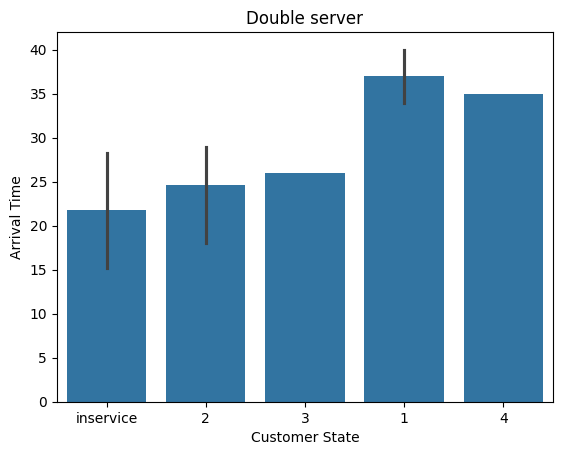

In [5]:
#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data , x='Customer State', y='Arrival Time')

plt.title('Double server')
plt.xlabel('Customer State')
plt.ylabel('Arrival Time')
plt.show()